## Importing Libraries

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense,BatchNormalization
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt 
import seaborn as sns   

## Importing the CSV file

In [2]:
df=pd.read_csv(r"C:\Users\sss\Downloads\Deep_Learning related\DL_CLASS\ASSIGNMENT_4\Multiple CSV\9.random.csv",header=None) 
df.head() 

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


## checking outliers 

In [4]:
df[2].value_counts()  


2
1.0    202
0.0    198
Name: count, dtype: int64

<Axes: >

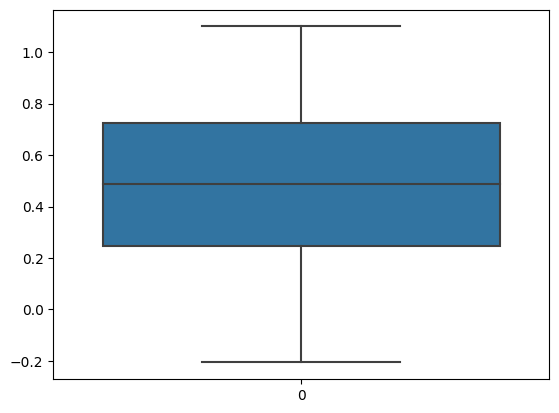

In [5]:
sns.boxplot(df[0])   

<Axes: >

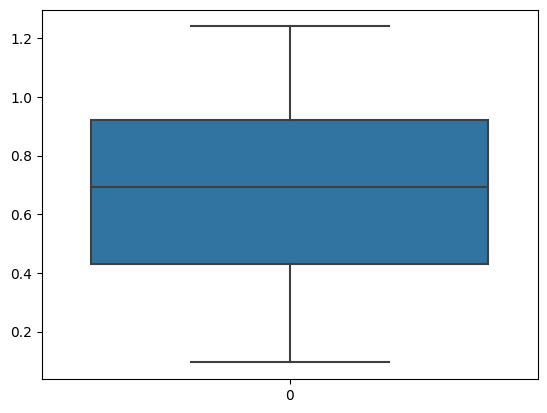

In [6]:
sns.boxplot(df[1])   

## splitting the data into input and output features

In [7]:
x=df[[0,1]] 
y=df[2].astype(int)  

In [8]:
x.head()  

,0,1
0,0.374,1.080
1,0.445,1.140
2,0.514,1.130
3,0.466,1.240
4,0.371,0.968


In [9]:
y.head() 

0    0
1    1
2    0
3    1
4    1
Name: 2, dtype: int32


## Split the data into train and test

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)  

In [11]:
x_train.shape  

(360, 2)

In [12]:
x_test.shape

(40, 2)

## Standardising input features

In [13]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

## Build the Logical Structure

In [15]:
model=Sequential()
model.add(Dense(16,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001),input_dim=2))
model.add(BatchNormalization())
model.add(Dense(14,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(BatchNormalization())
model.add(Dense(12,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(1,activation="sigmoid"))  

In [16]:
model.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 14)                238       
                                                                 
 batch_normalization_1 (Bat  (None, 14)                56        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 12)                180       
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [17]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=50,epochs=50,validation_split=0.1) 

Epoch 1/50
7/7 [==============================] - 4s 112ms/step - loss: 0.8261 - accuracy: 0.5123 - val_loss: 0.7884 - val_accuracy: 0.4722
Epoch 2/50
7/7 [==============================] - 0s 13ms/step - loss: 0.8129 - accuracy: 0.5154 - val_loss: 0.7893 - val_accuracy: 0.5278
Epoch 3/50
7/7 [==============================] - 0s 18ms/step - loss: 0.8146 - accuracy: 0.5031 - val_loss: 0.7896 - val_accuracy: 0.5278
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 0.8082 - accuracy: 0.5062 - val_loss: 0.7897 - val_accuracy: 0.5556
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 0.7982 - accuracy: 0.5185 - val_loss: 0.7893 - val_accuracy: 0.5833
Epoch 6/50
7/7 [==============================] - 0s 13ms/step - loss: 0.7939 - accuracy: 0.5093 - val_loss: 0.7882 - val_accuracy: 0.5833
Epoch 7/50
7/7 [==============================] - 0s 25ms/step - loss: 0.7912 - accuracy: 0.5093 - val_loss: 0.7873 - val_accuracy: 0.5833
Epoch 8/50
7/7 [==========

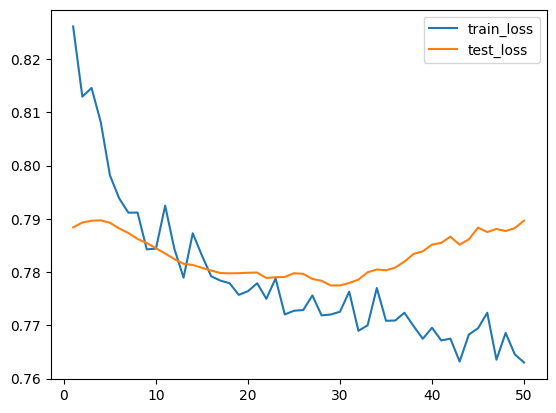

In [19]:
plt.plot(range(1,51),history.history["loss"],label="train_loss")
plt.plot(range(1,51),history.history["val_loss"],label="test_loss") 
plt.legend() 

## Predicting the model

In [20]:
predicted=model.predict(x_test) 
predicted 

2/2 [==============================] - 0s 6ms/step


array([[0.56947327],
       [0.4621522 ],
       [0.5593663 ],
       [0.5730638 ],
       [0.49871555],
       [0.5331093 ],
       [0.5465834 ],
       [0.41772357],
       [0.5889793 ],
       [0.5845852 ],
       [0.36470297],
       [0.50582886],
       [0.54413825],
       [0.4432265 ],
       [0.5389162 ],
       [0.5461947 ],
       [0.59475183],
       [0.49598387],
       [0.54726815],
       [0.546005  ],
       [0.5954602 ],
       [0.6026345 ],
       [0.56295204],
       [0.5965927 ],
       [0.54273576],
       [0.5431543 ],
       [0.59815794],
       [0.5512205 ],
       [0.39728525],
       [0.45617518],
       [0.4662258 ],
       [0.449799  ],
       [0.5378566 ],
       [0.5606262 ],
       [0.47570464],
       [0.5378122 ],
       [0.552364  ],
       [0.5305226 ],
       [0.45795968],
       [0.5279728 ]], dtype=float32)

In [21]:
predicted=np.where(predicted>0.5,1,0)
predicted   

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1]])

## Evaluating the model

0.525


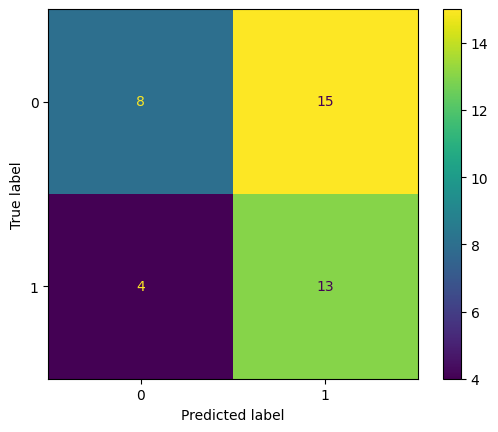

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

## PLOTTING THE DECISION SURFACE

In [23]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 31s 3ms/step


<Axes: >

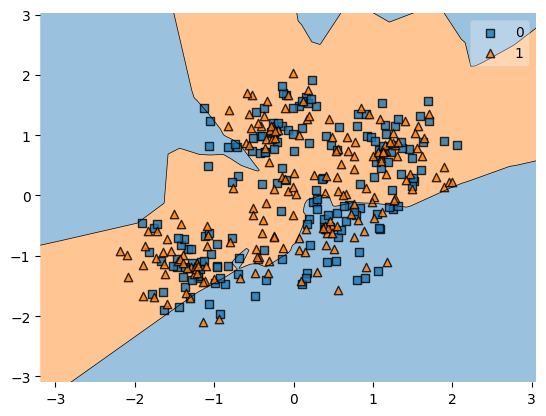

In [24]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 33s 3ms/step


<Axes: >

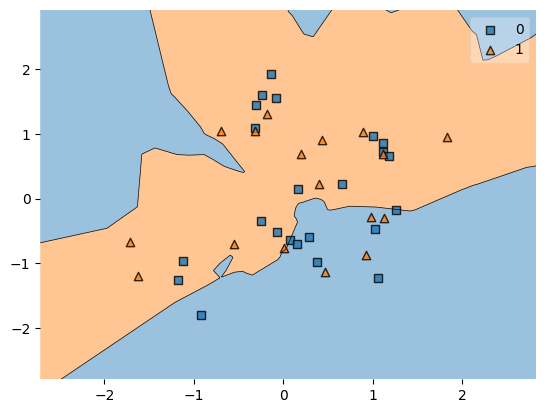

In [25]:
plot_decision_regions(x_test,y_test.values,clf=model)   

## Conclusions:

###### This neural network model achieves an accuracy of 50%. The model architecture consists of 2 hidden layers with the following specifications:

- In the first hidden layer, there are 16 neurons with the ReLU activation function.
- In the second hidden layer, there are 14 neurons with the ReLU activation function.
- In the third hidden layer, there are 12 neurons with the ReLU activation function.
- In the third hidden layer, there are 10 neurons with the ReLU activation function.

###### The output layer uses the sigmoid activation function.

##### For model compilation, the following settings were used:

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 500 epochs.
 
###### Overall, this neural network model architecture and training configuration achieve an accuracy of 50%.   
